In [102]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.stattools import durbin_watson
from statsmodels.compat import lzip
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

input_file = Path(r"/Users/gelo/REPOS/finm-data-analysis-2024/data/ols_forecasting_inflation_data.xlsx")

## 1. Assessing the OLS Model

## 1.1 
Estimate an OLS regression to see if CPI and Money are contemporaneously correlated: 

$$p_t = \alpha + \beta m_t + \epsilon_t$$

* Note that this is not a lagged regression, but rather a contemporaneous time-series regression. (We are not predicting a period ahead but rather fitting one series to the other at the same time period.)

- (a) Report the estimated R-squared. 
- (b) Report the point-estimate of $\beta$.

In [103]:
macro_df = pd.read_excel(input_file, sheet_name='macro',header=0,index_col=0)
SnP_df = pd.read_excel(input_file, sheet_name='s&p500',header=0,index_col=0)
macro_df.head()

,CPI,M2
date,,
1959-01-31,29.01,286.6
1959-02-28,29.00,287.7
1959-03-31,28.97,289.2
1959-04-30,28.98,290.1
1959-05-31,29.04,292.2


In [104]:
SnP_df.head()

,SPY
Date,
1993-02-28,0.010669
1993-03-31,0.022400
1993-04-30,-0.025588
1993-05-31,0.026969
1993-06-30,0.003607


In [105]:
y = macro_df['CPI']
x = macro_df['M2']
X = sm.add_constant(x)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CPI   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     3953.
Date:                Wed, 14 Aug 2024   Prob (F-statistic):          4.74e-308
Time:                        13:00:35   Log-Likelihood:                -3862.5
No. Observations:                 784   AIC:                             7729.
Df Residuals:                     782   BIC:                             7738.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.1015      1.643     40.233      0.000      62.876      69.327
M2             0.0135      0.000     62.876      0.000       0.013       0.014
==============================================================================
Omnibus:                     1138.015   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.400
Skew:                          -0.233   Prob(JB):                     7.66e-14
Kurtosis:                       1.723   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 1.2. 

This time, examine a regression of growth rates. Specifically, estimate an OLS regression to see if inflation and money growth are contemporaneously correlated:

$$i_{t,t+h} = \alpha + \beta g_{t,t+h} + \epsilon_{t,t+h}$$

* Note that this is not a lagged regression, but rather a regular time-series regression.

Answer the questions below for a one-year horizon: $h = 12$. 
- (a) Report the estimated R-squared.
- (b) Report the point-estimate of $\beta$.

In [106]:
y_growth = y.pct_change(12).dropna().rename('Inflation')
x_growth = x.pct_change(12).dropna().rename('Money Growth')
X_growth = sm.add_constant(x_growth)
model = sm.OLS(y_growth,X_growth)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Inflation   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.293
Date:                Wed, 14 Aug 2024   Prob (F-statistic):             0.0700
Time:                        13:00:35   Log-Likelihood:                 1661.7
No. Observations:                 772   AIC:                            -3319.
Df Residuals:                     770   BIC:                            -3310.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0344      0.002     16.377      0.000       0.030       0.038
Money Growth     0.0482      0.027      1.815      0.070      -0.004       0.100
==============================================================================
Omnibus:                      207.373   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              450.733
Skew:                           1.474   Prob(JB):                     1.33e-98
Kurtosis:                       5.307   Cond. No.                         26.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 1.3. 

The result of regressing inflation on money growth is very different from regressing CPI on Money. 

- (a) What do you conclude? 
- When we take the stationary, no drift then we can see that we cant explain y based on x
- (b) Does it seem that variation in money contemporaneously explains variation in inflation? - NO
- (c) In particular, what is wrong with one of the two regression models? Consider plotting the raw dependent and independent variable of each.


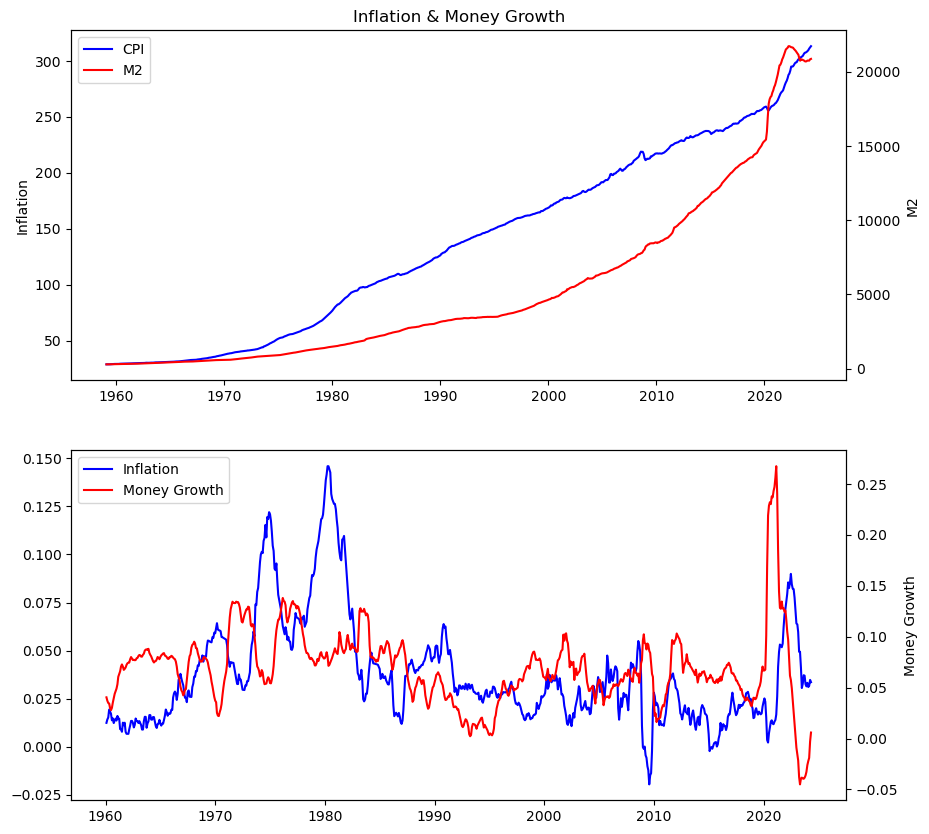

In [107]:
fig, ax = plt.subplots(2,1,figsize=(10,10))

l1, = ax[0].plot(y, label='CPI', color ='blue')
ax[0].set_ylabel('CPI')
ax[0].set_title('CPI & M2')

ax2 = ax[0].twinx()
l2, = ax2.plot(x, label='M2', color='red')
ax2.set_ylabel('M2')
lines = [l1, l2]
labels = [line.get_label() for line in lines]
ax[0].legend(lines, labels)



l3, = ax[1].plot(y_growth, label='Inflation', color ='blue')
ax[0].set_ylabel('Inflation')
ax[0].set_title('Inflation & Money Growth')

ax4 = ax[1].twinx()
l4, = ax4.plot(x_growth, label='Money Growth', color='red')
ax4.set_ylabel('Money Growth')
lines = [l3, l4]
labels = [line.get_label() for line in lines]
ax[1].legend(lines, labels, loc='upper left')


## 1.4.

Answer the remaining questions regarding the estimation of inflation on money growth in 1.2 above.

Do the sample residuals, $e$ seem to be iid? That is,
- (a) do they seem to be drawn from a constant variance? 
- Seems to be centered around 0, seems like constant variance. Breusch-Pagan Value below 0.05, reject null hypothesis of constant variance
- (b) do they have serial correlation?
- Present Serial correlation, Durbin Watson close to 0

Assess this informally by plotting the time-series of estimated sample residuals, $e$.

<Axes: title={'center': 'Residuals'}, xlabel='date'>

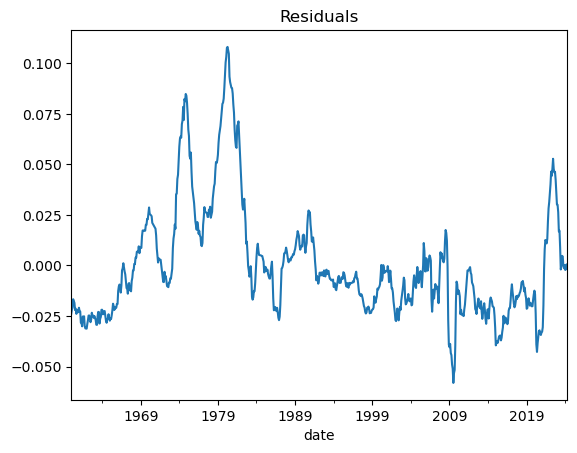

In [108]:
results.resid.plot(title='Residuals')

In [109]:
BP_val = sms.het_breuschpagan(results.resid, results.model.exog)
print('Breusch-Pagan p-value:', BP_val[1])

dw_stat = durbin_watson(results.resid)
print('Durbin-Watson statistic:', dw_stat)


Breusch-Pagan p-value: 0.0021566910628542917
Durbin-Watson statistic: 0.019597387785175977


## 1.5.


Suppose that the residuals do not fit the classic OLS assumptions. (Technically speaking, consider that they are heteroskedastic and have serial correlation.)

- (a) Report whether the estimates for $\alpha$ or $\beta$ are statistically significant relative to 0, for a significance level of 5%. (Check the reported p-value for each of the estimates, perhaps using stats-models OLS function.)
- (b) Do you have concerns about the accuracy of the reported p-values?
- (c) Do you have concerns about the estimated beta? For small samples, for large samples?

In [110]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Inflation   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.293
Date:                Wed, 14 Aug 2024   Prob (F-statistic):             0.0700
Time:                        13:00:35   Log-Likelihood:                 1661.7
No. Observations:                 772   AIC:                            -3319.
Df Residuals:                     770   BIC:                            -3310.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0344      0.002     16.377      0.000       0.030       0.038
Money Growth     0.0482      0.027      1.815      0.070      -0.004       0.100
==============================================================================
Omnibus:                      207.373   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              450.733
Skew:                           1.474   Prob(JB):                     1.33e-98
Kurtosis:                       5.307   Cond. No.                         26.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 1.6. 

- (a) Assess the residuals with the Durbin-Watson test for serial correlation. 
- (b) Formally assess heteroskedasticity of the residuals with White’s test.

### Hints

- (a) This is reported by default in the stats-models OLS estimation summary. A value less than 2 would indicate potential issues with serial correlation.
- (b) See the documentation for the stats-model package.

In [111]:
white_test = sms.het_white(results.resid, results.model.exog)
# Unpack the results
test_statistic, p_value, f_statistic, f_p_value = white_test

# Print the results
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
res = lzip(labels, white_test)
print(pd.DataFrame(res, columns=['Test', 'Value']))

                     Test      Value
0          Test Statistic  17.638369
1  Test Statistic p-value   0.000148
2             F-Statistic   8.990320
3          F-Test p-value   0.000138


Interpretation:
- Test Statistic: This is the test statistic for White's test, which follows a chi-squared distribution.
- 
- p-value: The p-value associated with the test statistic. If this p-value is below your significance level (commonly 0.05), you reject the null hypothesis of homoskedasticity, indicating evidence of heteroskedasticity.
- 
- P-value less than 0.05, reject homoscedasticity
- 
- F-Statistic and F-Test p-value: These are additional statistics used to confirm the presence of heteroskedasticity, though typically the test statistic and its p-value are sufficient for making a decision.

## 1.7. 

Try redoing this entire problem, but this time with a lagged, forecasting regression instead of a contemporaneous regression. Namely, replace the equation in 1.2 with,

$$i_{t,t+h} = \alpha + \beta g_{t-h,t} + \epsilon_{t,t+h}$$

What do you think of the ability of past inflation and money growth to forecast future inflation?

### Hint
This should be easy to reform just this equation and then rerun the same code.

In [112]:
X_growth_lagged = X_growth.shift(12).dropna()
y_growth_adj = y_growth[12:]
print(len(X_growth_lagged), len(y_growth_adj))

model = sm.OLS(y_growth_adj,X_growth_lagged)
results_lag = model.fit()
results_lag.summary()


760 760


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Inflation   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     81.33
Date:                Wed, 14 Aug 2024   Prob (F-statistic):           1.54e-18
Time:                        13:00:36   Log-Likelihood:                 1671.0
No. Observations:                 760   AIC:                            -3338.
Df Residuals:                     758   BIC:                            -3329.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0210      0.002      9.849      0.000       0.017       0.025
Money Growth     0.2417      0.027      9.018      0.000       0.189       0.294
==============================================================================
Omnibus:                      215.650   Durbin-Watson:                   0.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              517.734
Skew:                           1.496   Prob(JB):                    3.76e-113
Kurtosis:                       5.720   Cond. No.                         27.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Inflation   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.293
Date:                Wed, 14 Aug 2024   Prob (F-statistic):             0.0700
Time:                        13:00:40   Log-Likelihood:                 1661.7
No. Observations:                 772   AIC:                            -3319.
Df Residuals:                     770   BIC:                            -3310.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0344      0.002     16.377      0.000       0.030       0.038
Money Growth     0.0482      0.027      1.815      0.070      -0.004       0.100
==============================================================================
Omnibus:                      207.373   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              450.733
Skew:                           1.474   Prob(JB):                     1.33e-98
Kurtosis:                       5.307   Cond. No.                         26.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""